In [ ]:
Name :Omkar Hulawale
Batch : TE-A3
Roll No: 13165

In [ ]:
 1. Selection Sort

Enter the array to sort (space separated):  5 3 8 1 2


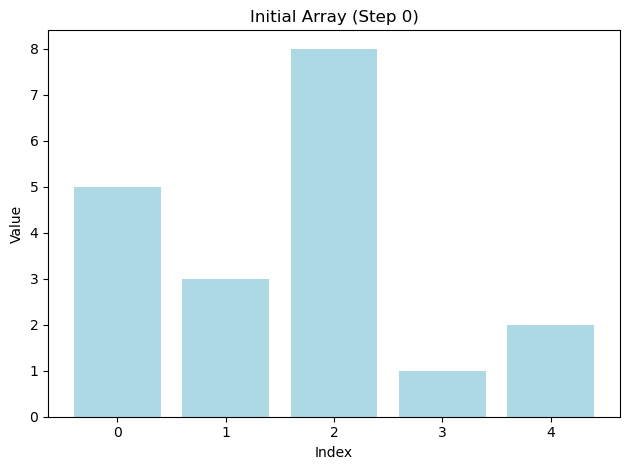

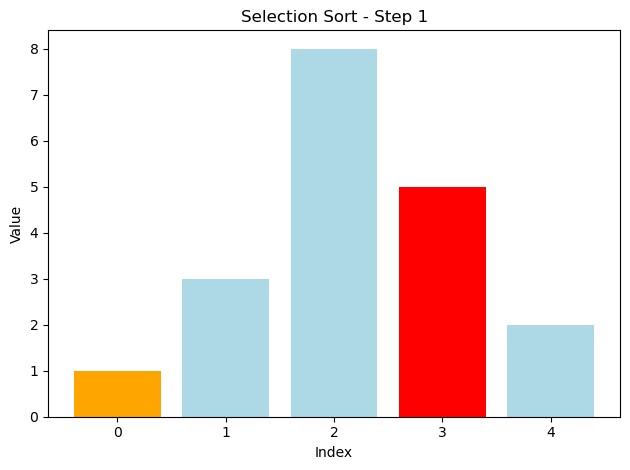

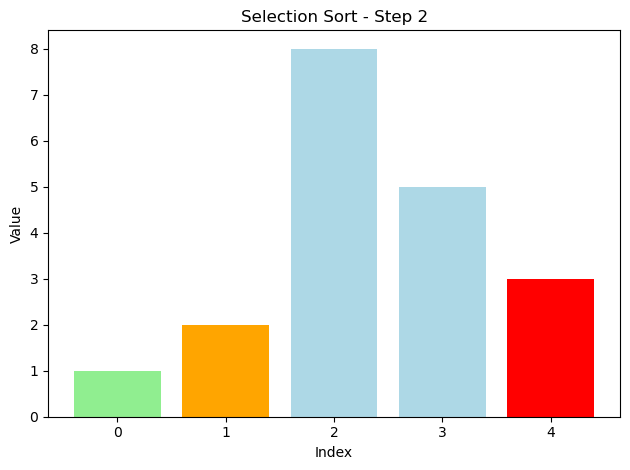

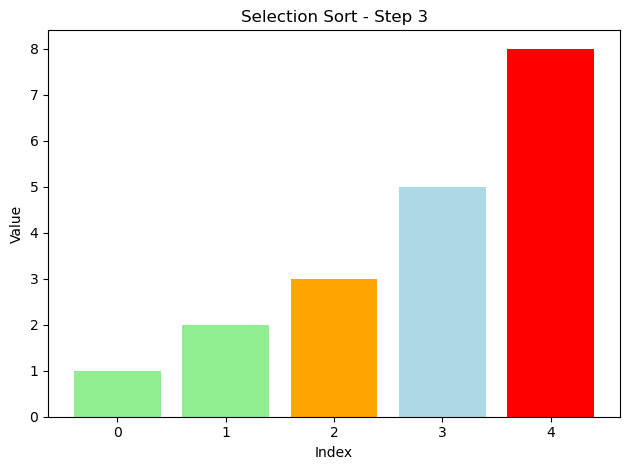

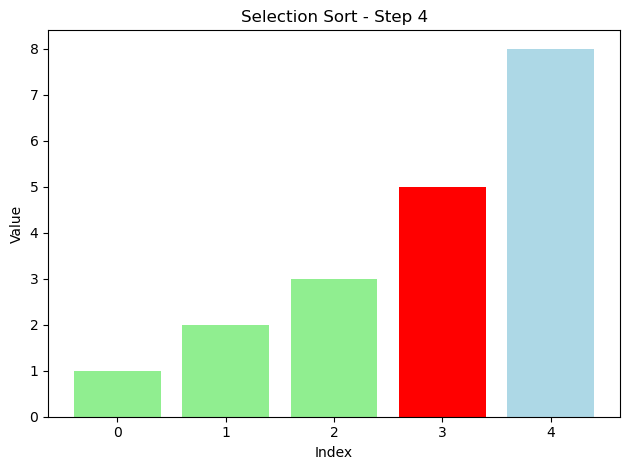

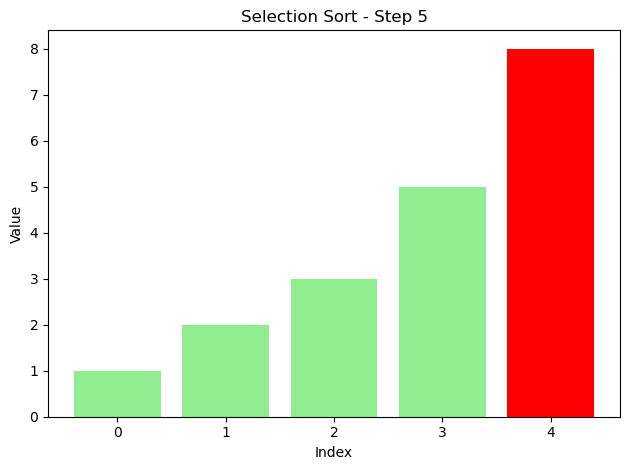

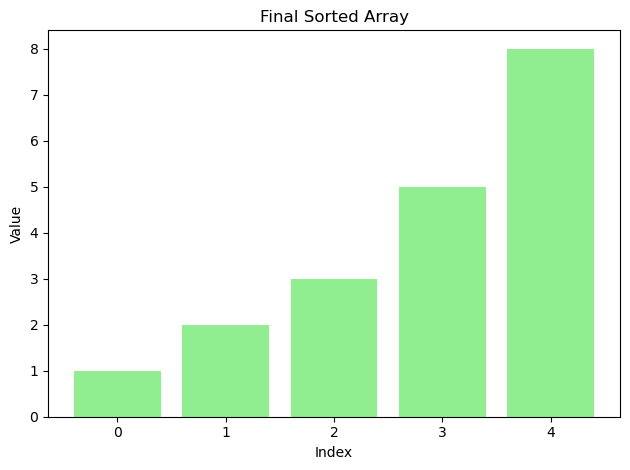

Sorted Array: [1, 2, 3, 5, 8]


In [1]:
import matplotlib.pyplot as plt

def selection_sort(arr):
    """
    Perform selection sort and visualize each step including the initial state.
    """
    n = len(arr)

    # Step 0: Show the initial unsorted array
    visualize_selection_sort(arr, step=0, i=-1, min_idx=-1)
    plt.pause(1.0)  # Pause to show the initial array

    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j

        if i != min_idx:
            arr[i], arr[min_idx] = arr[min_idx], arr[i]

        visualize_selection_sort(arr, step=i + 1, i=i, min_idx=min_idx)
        plt.pause(0.5)  # Pause between steps

    return arr

def visualize_selection_sort(arr, step, i, min_idx):
    """
    Visualize selection sort progress with color-coded bars.
    Green: Sorted portion
    Red: Minimum element in current pass
    Orange: Element being compared/swapped
    """
    plt.clf()
    colors = []

    for idx in range(len(arr)):
        if i == -1:
            colors.append('lightblue')  # Initial state: all unsorted
        elif idx < i:
            colors.append('lightgreen')  # Sorted portion
        elif idx == min_idx:
            colors.append('red')  # Minimum element
        elif idx == i:
            colors.append('orange')  # Current index
        else:
            colors.append('lightblue')  # Unsorted

    plt.bar(range(len(arr)), arr, color=colors)
    title = "Initial Array (Step 0)" if step == 0 else f"Selection Sort - Step {step}"
    plt.title(title)
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.tight_layout()
    plt.draw()

# Input from user
arr = list(map(int, input("Enter the array to sort (space separated): ").split()))

# Enable interactive plotting
plt.ion()

# Run selection sort with visualization
sorted_arr = selection_sort(arr)

# Final sorted array display
plt.clf()
plt.bar(range(len(arr)), arr, color='lightgreen')
plt.title("Final Sorted Array")
plt.xlabel("Index")
plt.ylabel("Value")
plt.tight_layout()
plt.ioff()
plt.show()

print(f"Sorted Array: {sorted_arr}")


In [ ]:
 2. Minimum Spanning Tree Using Kruskal's Alogorithm

Enter the number of edges:  7
Enter edge (u v weight):  1 2 4
Enter edge (u v weight):  1 3 2
Enter edge (u v weight):  2 3 5
Enter edge (u v weight):  2 4 10
Enter edge (u v weight):  3 4 3
Enter edge (u v weight):  3 5 6
Enter edge (u v weight):  4 5 8


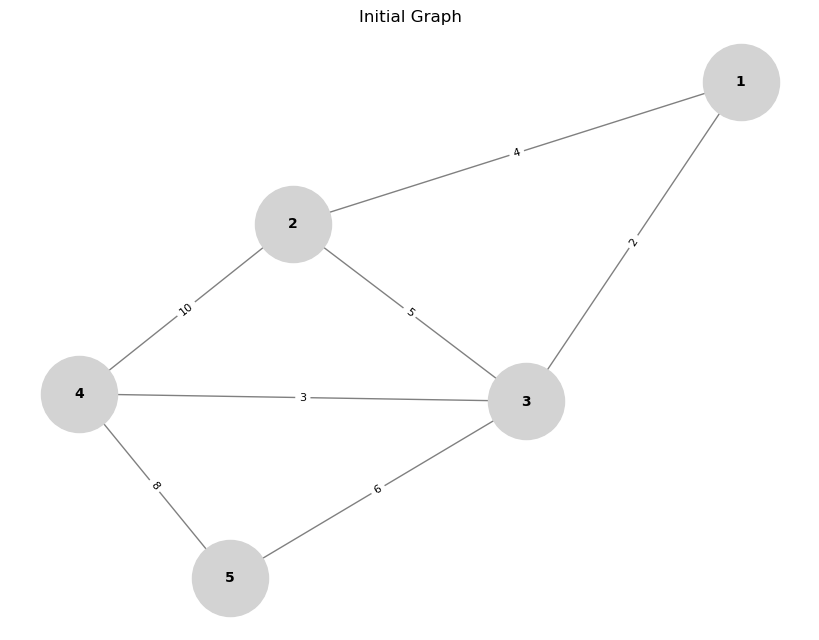

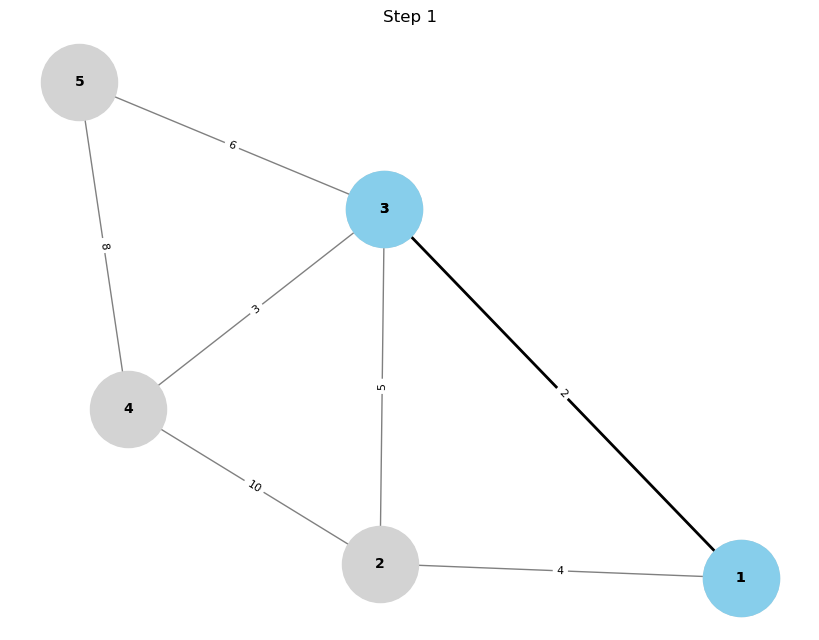

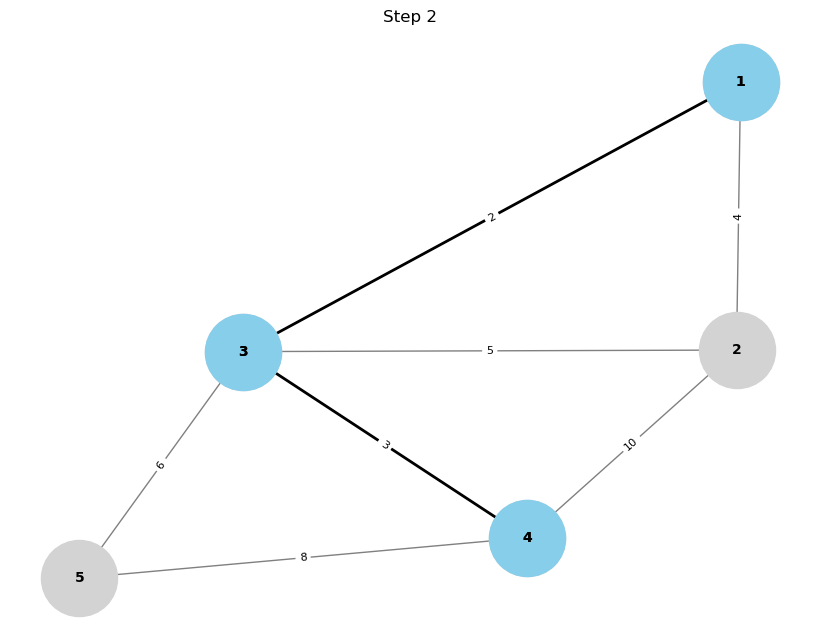

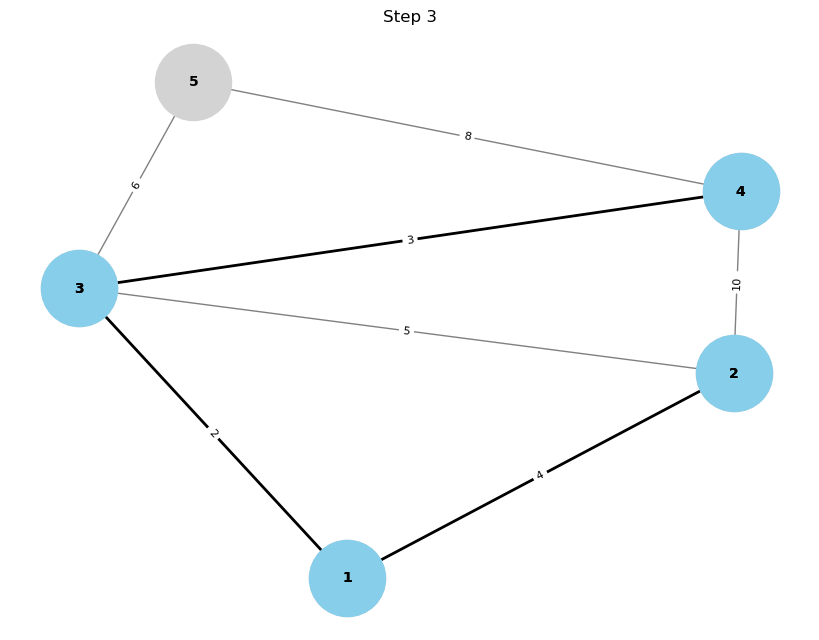

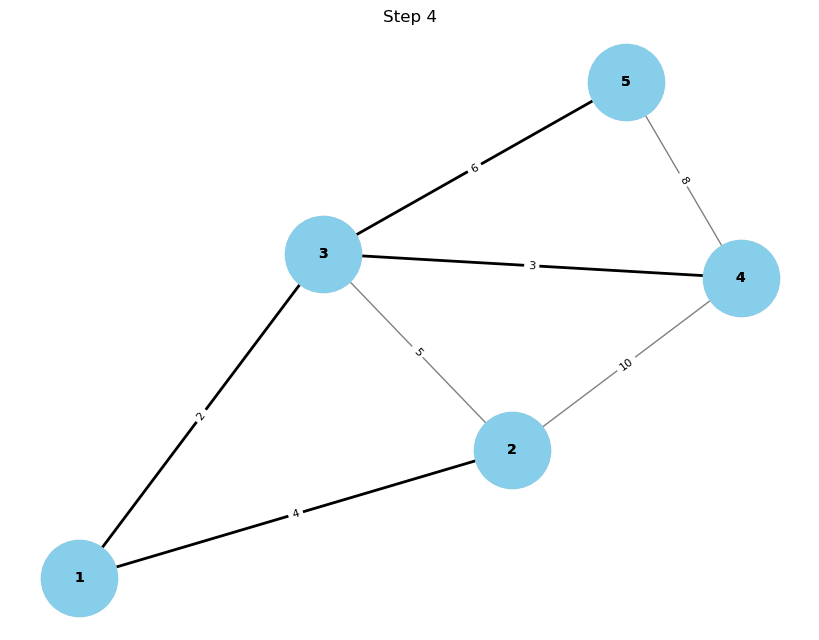

Minimum Spanning Tree edges: [(1, 3, 2), (3, 4, 3), (1, 2, 4), (3, 5, 6)]


In [5]:
import time
import networkx as nx
import matplotlib.pyplot as plt

def kruskal_mst(graph):
    """
    Kruskal's Algorithm to find the Minimum Spanning Tree (MST) of a graph.
    It returns the edges in the MST and visualizes the process step by step.
    """
    parent = {}
    rank = {}
    
    def find(u):
        if parent[u] != u:
            parent[u] = find(parent[u])  # Path compression
        return parent[u]
    
    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        
        if root_u != root_v:
            if rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            elif rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            else:
                parent[root_v] = root_u
                rank[root_u] += 1

    for node in graph.nodes():
        parent[node] = node
        rank[node] = 0

    edges = list(graph.edges(data=True))
    edges.sort(key=lambda x: x[2]['weight'])  # Sort by edge weight

    mst_edges = []

    # Show the initial graph before starting Kruskal’s Algorithm
    visualize_graph(graph, mst_edges, "Initial Graph")

    for u, v, data in edges:
        if find(u) != find(v):
            mst_edges.append((u, v, data['weight']))  # Save edge with weight
            union(u, v)

            # Visualize the current MST after each step
            visualize_graph(graph, mst_edges, f"Step {len(mst_edges)}")
            time.sleep(1)  # Pause to show the step
    
    return mst_edges

def visualize_graph(graph, mst_edges, title="Graph Visualization"):
    """
    Visualize the original graph and MST step by step.
    """
    plt.figure(figsize=(8, 6))
    
    pos = nx.spring_layout(graph)  # Fixed layout for consistency
    
    # Draw original graph with all edges
    nx.draw(graph, pos, with_labels=True, node_color='lightgray', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', width=1)

    # Highlight MST edges
    mst_graph = nx.Graph()
    mst_graph.add_edges_from([(u, v, {'weight': w}) for u, v, w in mst_edges])
    nx.draw(mst_graph, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='black', width=2)

    # Display edge weights
    edge_labels = {(u, v): data['weight'] for u, v, data in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title(title)
    plt.show()

def get_user_input():
    """
    Get the graph input from the user.
    """
    graph = nx.Graph()
    
    num_edges = int(input("Enter the number of edges: "))
    
    for _ in range(num_edges):
        u, v, weight = input("Enter edge (u v weight): ").split()
        u, v, weight = int(u), int(v), int(weight)
        graph.add_edge(u, v, weight=weight)
    
    return graph

# Get the graph from user input
graph = get_user_input()

# Run Kruskal's Algorithm to find MST and visualize
mst = kruskal_mst(graph)
print("Minimum Spanning Tree edges:", mst)


In [ ]:
 3. Minimum Spanning Tree Using Prim's ALgorithm

Enter number of edges:  7
Enter edge (u v weight):  1 2 3
Enter edge (u v weight):  1 3 1
Enter edge (u v weight):  2 3 7
Enter edge (u v weight):  2 4 5
Enter edge (u v weight):  3 4 2
Enter edge (u v weight):  3 5 4
Enter edge (u v weight):  4 5 6
Enter the start node for Prim's Algorithm:  1


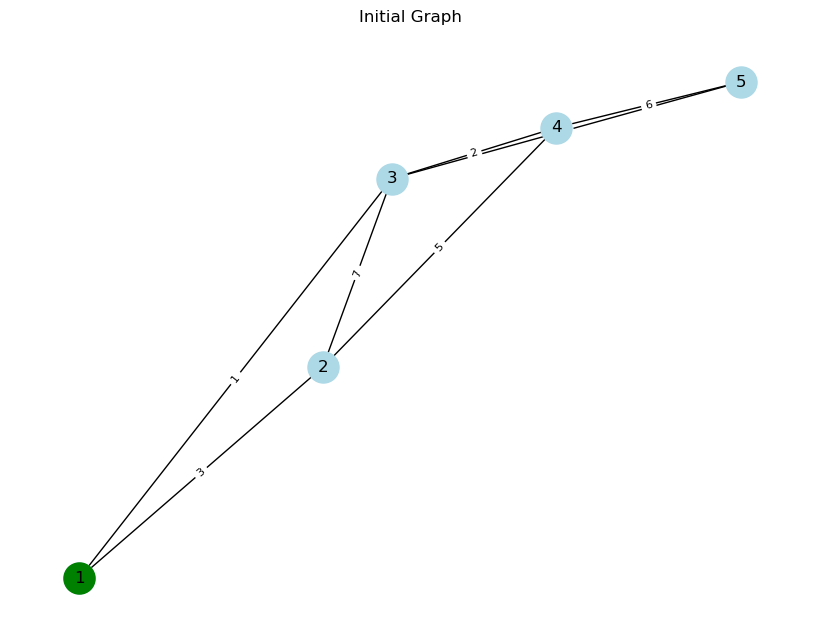

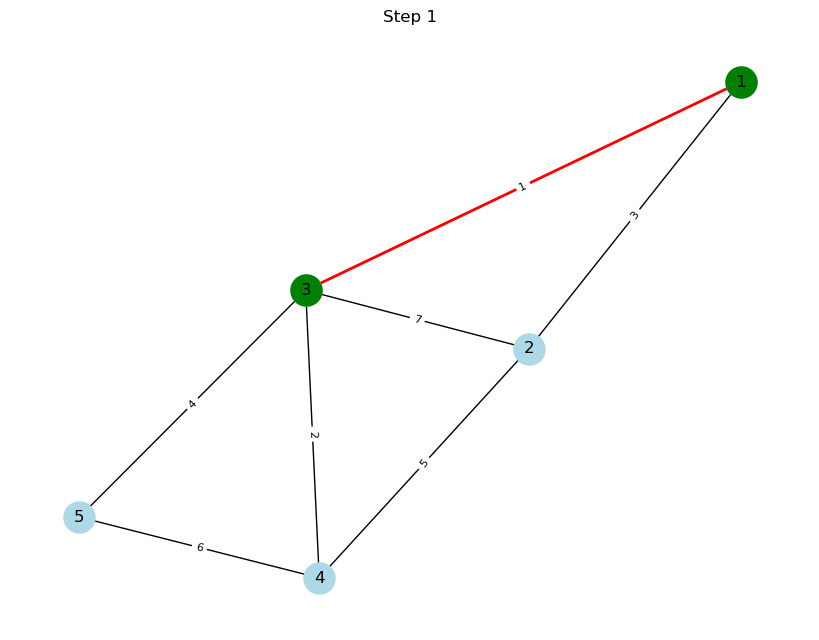

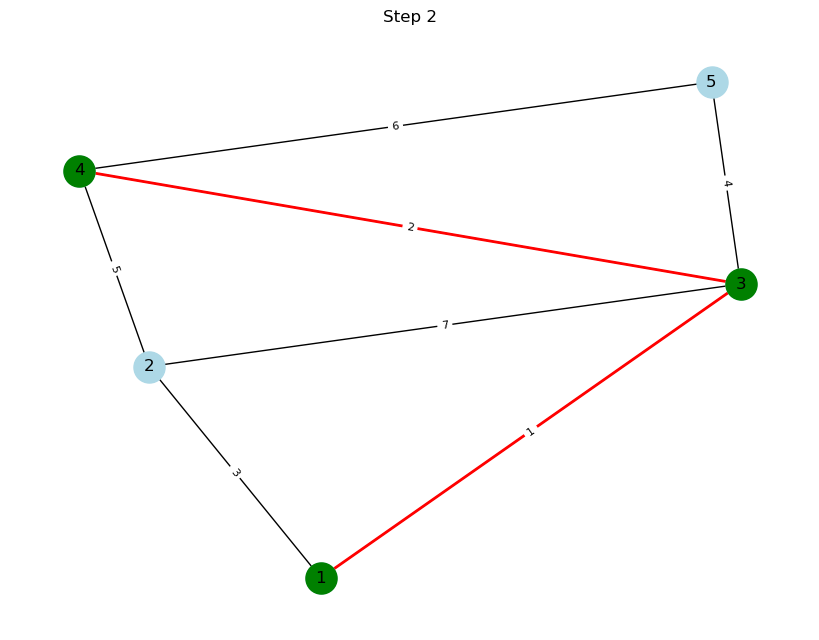

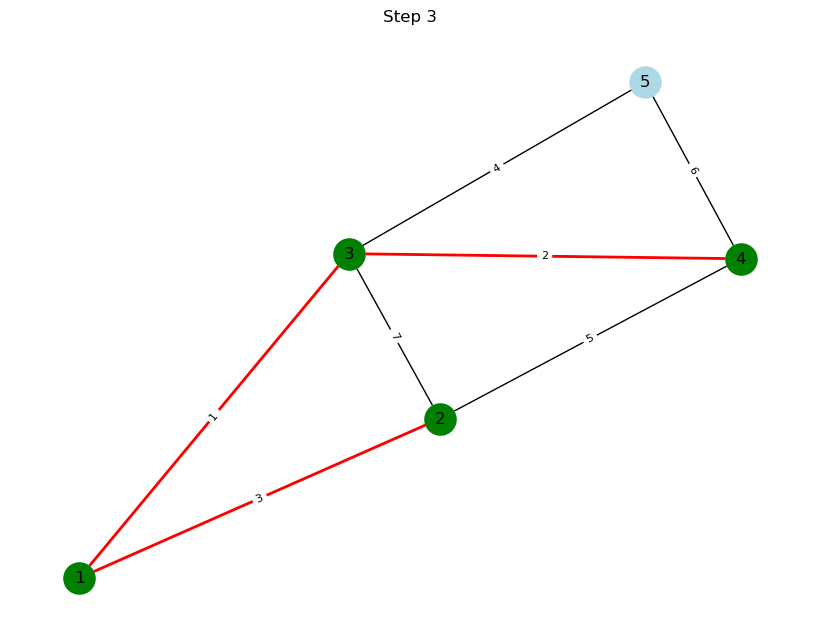

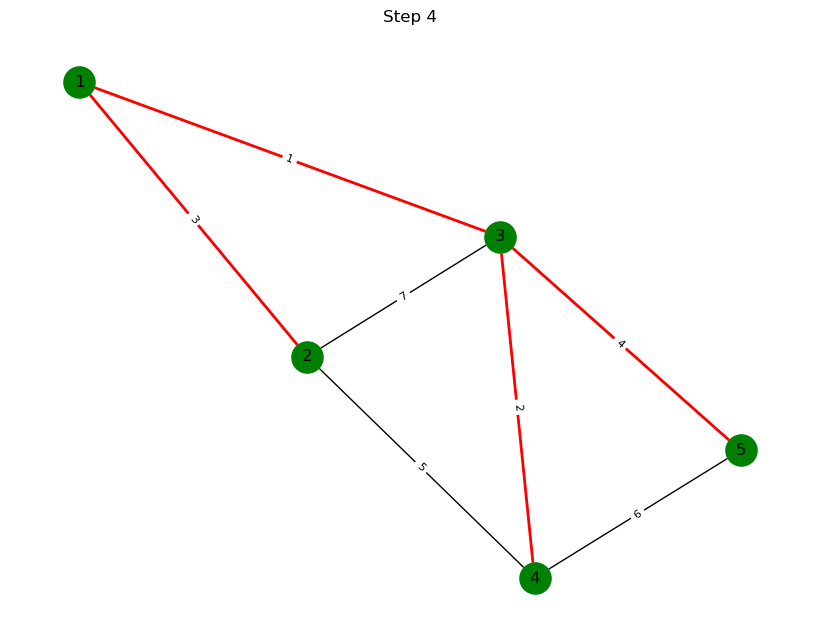

Minimum Spanning Tree edges: [(1, 3, 1), (3, 4, 2), (1, 2, 3), (3, 5, 4)]


In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import time

def prim_mst(graph, start_node):
    """
    Perform Prim's algorithm to find the MST and visualize each step.
    """
    mst_edges = []              # To store the edges in the MST
    visited = set([start_node]) # Set to keep track of visited nodes
    all_edges = list(graph.edges(data=True))  # List of all edges in the graph

    # Show the initial graph before starting Prim’s Algorithm
    visualize_graph(graph, mst_edges, visited, title="Initial Graph")

    while len(visited) < len(graph.nodes):  # While not all nodes are in the MST
        min_edge = None
        min_weight = float('inf')

        # Check all edges for the minimum weight edge that connects a visited node to a non-visited node
        for u, v, data in all_edges:
            if u in visited and v not in visited:
                weight = data['weight']
                if weight < min_weight:
                    min_weight = weight
                    min_edge = (u, v, weight)
            elif v in visited and u not in visited:
                weight = data['weight']
                if weight < min_weight:
                    min_weight = weight
                    min_edge = (v, u, weight)

        if min_edge:
            u, v, weight = min_edge
            mst_edges.append((u, v, weight))  # Add the minimum weight edge to the MST
            visited.add(v)  # Mark the new node as visited
            
            # Visualize the graph after adding the new edge to the MST
            visualize_graph(graph, mst_edges, visited, title=f"Step {len(mst_edges)}")
            time.sleep(1)  # Pause for a moment to show the step

    return mst_edges

def visualize_graph(graph, mst_edges, visited, title="Graph Visualization"):
    """
    Visualize the graph and the MST after each step.
    """
    plt.figure(figsize=(8, 6))
    
    pos = nx.spring_layout(graph)  # Generate layout for consistency
    
    # Draw the full graph with edges in black
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, edge_color='black', width=1)

    # Highlight MST edges in red
    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, edge_color='red', width=2)
    
    # Highlight visited nodes in green
    nx.draw_networkx_nodes(graph, pos, nodelist=visited, node_color='green', node_size=500)
    
    # Display edge weights
    edge_labels = {(u, v): data['weight'] for u, v, data in graph.edges(data=True)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=8)

    plt.title(title)
    plt.show()

# Input graph from the user
graph = nx.Graph()
num_edges = int(input("Enter number of edges: "))

# Get the edges from the user
for _ in range(num_edges):
    u, v, weight = map(int, input("Enter edge (u v weight): ").split())
    graph.add_edge(u, v, weight=weight)

start_node = int(input("Enter the start node for Prim's Algorithm: "))

# Run Prim's Algorithm to find MST and visualize
mst = prim_mst(graph, start_node)
print("Minimum Spanning Tree edges:", mst)


In [ ]:
 4. Single-Source Shortest Path Using Dijkstra Minimal Spanning Tree

Enter the number of nodes:  5

Enter node:  1
Enter the number of edges for node 1:  2
Enter neighbor and weight (space-separated):  2 10
Enter neighbor and weight (space-separated):  3 3

Enter node:  2
Enter the number of edges for node 2:  2
Enter neighbor and weight (space-separated):  3 1
Enter neighbor and weight (space-separated):  4 2

Enter node:  3
Enter the number of edges for node 3:  3
Enter neighbor and weight (space-separated):  2 4
Enter neighbor and weight (space-separated):  4 8
Enter neighbor and weight (space-separated):  5 2

Enter node:  4
Enter the number of edges for node 4:  1
Enter neighbor and weight (space-separated):  5 7

Enter node:  5
Enter the number of edges for node 5:  1
Enter neighbor and weight (space-separated):  4 9

Enter start node:  1


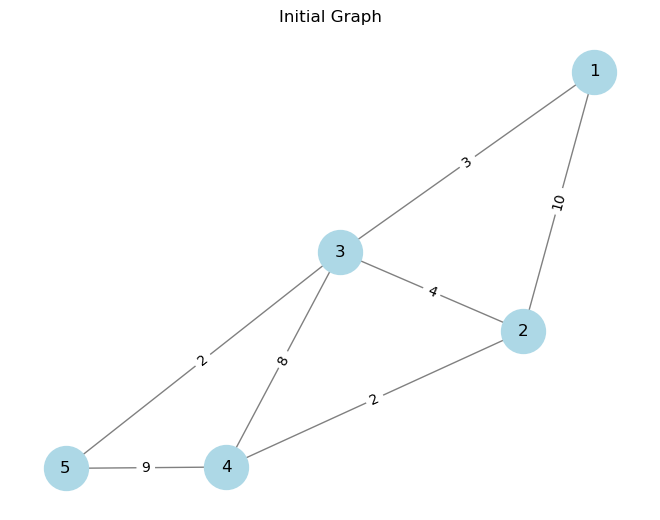


Running Dijkstra's Algorithm...


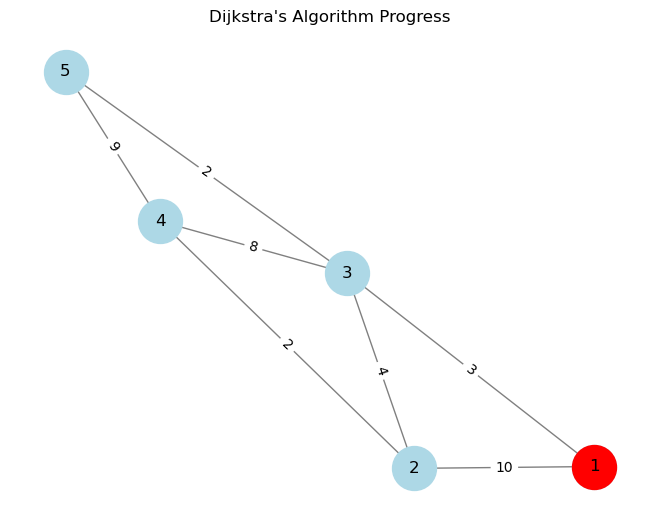

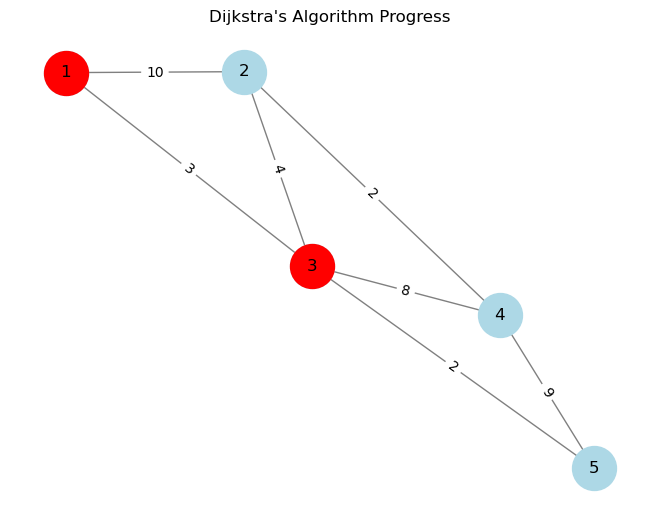

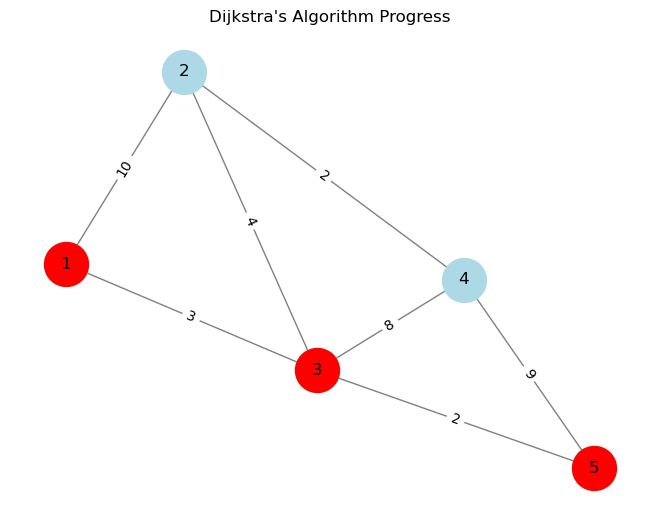

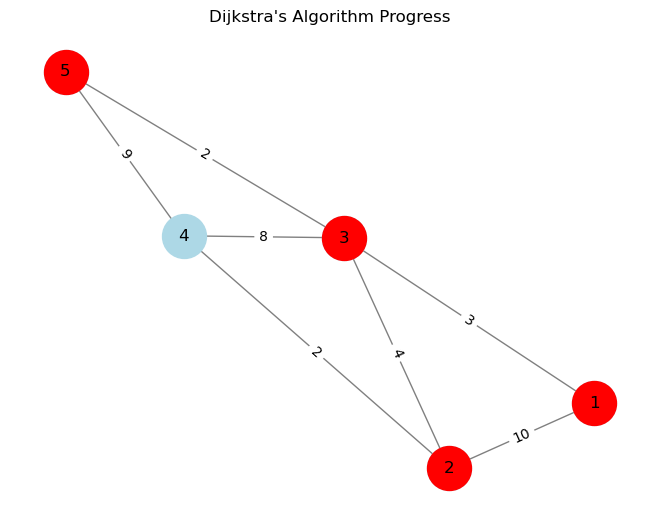

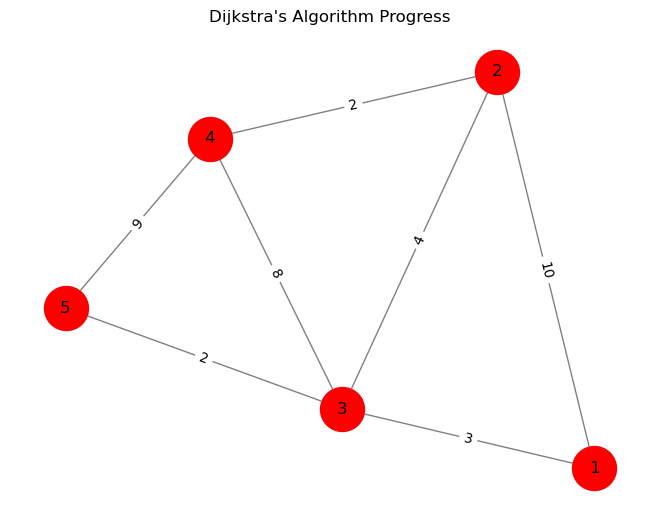


Shortest Paths from Node 1:
To node 2: Cost = 7, Path = 1 -> 3 -> 2
To node 3: Cost = 3, Path = 1 -> 3
To node 4: Cost = 9, Path = 1 -> 3 -> 2 -> 4
To node 5: Cost = 5, Path = 1 -> 3 -> 5


In [33]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(graph):
    """Draws the initial graph before running Dijkstra's Algorithm."""
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=10)
    plt.title("Initial Graph")
    plt.show()

def visualize_dijkstra(graph, visited):
    """Visualizes Dijkstra's Algorithm progress with visited nodes in red."""
    G = nx.Graph()
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    pos = nx.spring_layout(G)
    labels = {node: str(node) for node in G.nodes}  # Show only node numbers
    edge_labels = nx.get_edge_attributes(G, 'weight')
    plt.clf()
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', edge_color='gray', 
            node_size=1000, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red', node_size=1000)
    plt.title("Dijkstra's Algorithm Progress")
    plt.pause(1)

def dijkstra(graph, start):
    """Runs Dijkstra's Algorithm and returns the shortest paths."""
    heap = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = set()
    previous = {node: None for node in graph}  # To track the shortest path

    while heap:
        cost, node = heapq.heappop(heap)
        if node in visited:
            continue
        visited.add(node)
        visualize_dijkstra(graph, visited)

        for neighbor, weight in graph[node]:
            new_cost = cost + weight
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                previous[neighbor] = node
                heapq.heappush(heap, (new_cost, neighbor))

    return distances, previous

def get_shortest_path(previous, start, end):
    """Backtracks to find the shortest path from start to end."""
    path = []
    while end is not None:
        path.append(end)
        end = previous[end]
    return path[::-1]

# --- User Input ---
graph = {}
num_nodes = int(input("Enter the number of nodes: "))

for _ in range(num_nodes):
    node = int(input("\nEnter node: "))
    graph[node] = []
    
    num_edges = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(num_edges):
        neighbor, weight = map(int, input("Enter neighbor and weight (space-separated): ").split())
        graph[node].append((neighbor, weight))

start_node = int(input("\nEnter start node: "))

# Show Initial Graph
draw_graph(graph)

# Run Dijkstra's Algorithm
plt.ion()
print("\nRunning Dijkstra's Algorithm...")
shortest_paths, previous_nodes = dijkstra(graph, start_node)
plt.ioff()
plt.show()

# Final Output: Display Shortest Paths
print(f"\nShortest Paths from Node {start_node}:")
for node in shortest_paths:
    if node != start_node:
        path = get_shortest_path(previous_nodes, start_node, node)
        print(f"To node {node}: Cost = {shortest_paths[node]}, Path = {' -> '.join(map(str, path))}")


In [ ]:
 5. Job Scheduling Problem

In [1]:
def job_sequencing(jobs):
    # Sort jobs based on descending profit
    jobs.sort(key=lambda x: x[2], reverse=True)

    # Find the maximum deadline to determine the number of time slots
    max_deadline = max(job[1] for job in jobs)

    # Initialize time slots and total profit
    time_slots = [-1] * max_deadline
    total_profit = 0

    # Iterate through each job
    for job in jobs:
        job_id, deadline, profit = job

        # Find a free time slot for this job (starting from the last possible slot)
        for slot in range(min(deadline, max_deadline) - 1, -1, -1):
            if time_slots[slot] == -1:
                time_slots[slot] = job_id
                total_profit += profit
                break

    # Filter out unassigned slots and prepare the job sequence
    job_sequence = [job_id for job_id in time_slots if job_id != -1]

    return job_sequence, total_profit

# Function to get user input
def get_user_input():
    jobs = []
    num_jobs = int(input("Enter the number of jobs: "))
    for _ in range(num_jobs):
        job_id = input("Enter Job ID: ")
        deadline = int(input(f"Enter deadline for job {job_id}: "))
        profit = int(input(f"Enter profit for job {job_id}: "))
        jobs.append((job_id, deadline, profit))
    return jobs

# Main function
def main():
    jobs = get_user_input()
    sequence, profit = job_sequencing(jobs)
    print(f"\nOptimal job sequence: {sequence}")
    print(f"Total profit: {profit}")

if __name__ == "__main__":
    main()


Enter the number of jobs:  4
Enter Job ID:  A
Enter deadline for job A:  4
Enter profit for job A:  20
Enter Job ID:  B
Enter deadline for job B:  1
Enter profit for job B:  10
Enter Job ID:  C
Enter deadline for job C:  1
Enter profit for job C:  40
Enter Job ID:  D
Enter deadline for job D:  1
Enter profit for job D:  30



Optimal job sequence: ['C', 'A']
Total profit: 60
